In [12]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from zipfile import ZipFile
import tensorflow as tf
from PIL import Image
import os

In [2]:
with ZipFile('D:/User/sureTrust/IPython/Datasets/Img/pizzaClassification.zip') as zf:
    pass
    #zf.extractall('./../../Datasets/Img/pizzaClassification')

In [3]:
Image.open(r'D:\User\sureTrust\IPython\Datasets\Img\pizzaClassification\train\pizza\40449.jpg').size

(512, 384)

In [4]:
images=tf.keras.utils.image_dataset_from_directory(r'D:\User\sureTrust\IPython\Datasets\Img\pizzaClassification\train',batch_size=1600,color_mode='rgb',image_size=(64,64))

Found 1600 files belonging to 2 classes.


In [5]:
model=tf.keras.Sequential([
    layers.Conv2D(8,3,input_shape=(64,64,3),activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(16,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Conv2D(24,3,activation='leaky_relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(10,activation='leaky_relu'),
    layers.Dense(1,'sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 24)        3480      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 24)         0

In [7]:
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [8]:
for features,labels in images:
    features=tf.divide(features,255)
    record=model.fit(features,labels,batch_size=160,epochs=100)
    

Epoch 1/100
10/10 [==============================] - 9s 189ms/step - loss: 0.6877 - accuracy: 0.5300
Epoch 2/100
10/10 [==============================] - 2s 192ms/step - loss: 0.6700 - accuracy: 0.6037
Epoch 3/100
10/10 [==============================] - 2s 186ms/step - loss: 0.6464 - accuracy: 0.6263
Epoch 4/100
10/10 [==============================] - 2s 186ms/step - loss: 0.6317 - accuracy: 0.6438
Epoch 5/100
10/10 [==============================] - 2s 198ms/step - loss: 0.6078 - accuracy: 0.6844
Epoch 6/100
10/10 [==============================] - 2s 210ms/step - loss: 0.5876 - accuracy: 0.6856
Epoch 7/100
10/10 [==============================] - 2s 207ms/step - loss: 0.5755 - accuracy: 0.6956
Epoch 8/100
10/10 [==============================] - 2s 211ms/step - loss: 0.5594 - accuracy: 0.7244
Epoch 9/100
10/10 [==============================] - 2s 207ms/step - loss: 0.5379 - accuracy: 0.7287
Epoch 10/100
10/10 [==============================] - 2s 202ms/step - loss: 0.5095 - accura

In [9]:
tf.keras.models.save_model(model,r'D:\User\sureTrust\IPython\Datasets\models\pizzaClassification.h5')

In [11]:
model=tf.keras.models.load_model(r'D:\User\sureTrust\IPython\Datasets\models\pizzaClassification.h5')

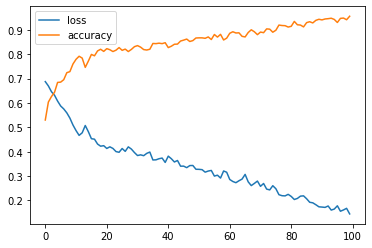

In [13]:
plt.plot(record.history['loss'],label='loss')
plt.plot(record.history['accuracy'],label='accuracy')
plt.legend()
plt.show()